<a href="https://colab.research.google.com/github/asmaamuhamed20/water-segmentation/blob/main/water_segmentation_(pretrain_model_deployment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

image_dir = '/content/drive/MyDrive/satellite_water_seg/images'
mask_dir = '/content/drive/MyDrive/satellite_water_seg/labels'

image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.tif')])
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

print(f"number of images {len(image_files)}")
print(f"number of labels {len(mask_files)}")

number of images 306
number of labels 456


In [3]:
valid_image_paths = []
valid_mask_paths = []

for img in image_files:
    img_name = os.path.splitext(img)[0]
    mask_name = img_name + '.png'
    if mask_name in mask_files:
        valid_image_paths.append(os.path.join(image_dir, img))
        valid_mask_paths.append(os.path.join(mask_dir, mask_name))

print(f"valid pairs: {len(valid_image_paths)}")

valid pairs: 306


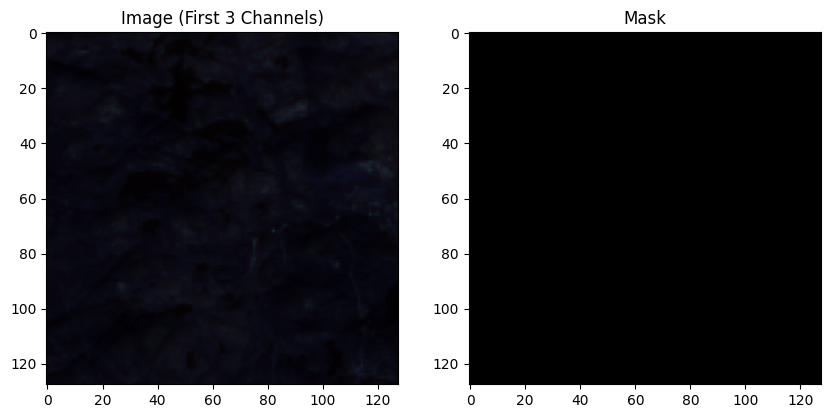

In [4]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_tif_image(path):
    image = tifffile.imread(path).astype(np.float32)
    image = np.clip(image, 0, 10000)
    image = (image - image.min()) / (image.max() - image.min() + 1e-6)
    return image


def load_mask(path):
    return np.array(Image.open(path).convert('L')) // 255

def visualize_sample(image_path, mask_path):
    image = load_tif_image(image_path)
    mask = load_mask(mask_path)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(image[:, :, :3])
    axs[0].set_title('Image (First 3 Channels)')

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Mask')

    plt.show()
visualize_sample(valid_image_paths[0], valid_mask_paths[0])

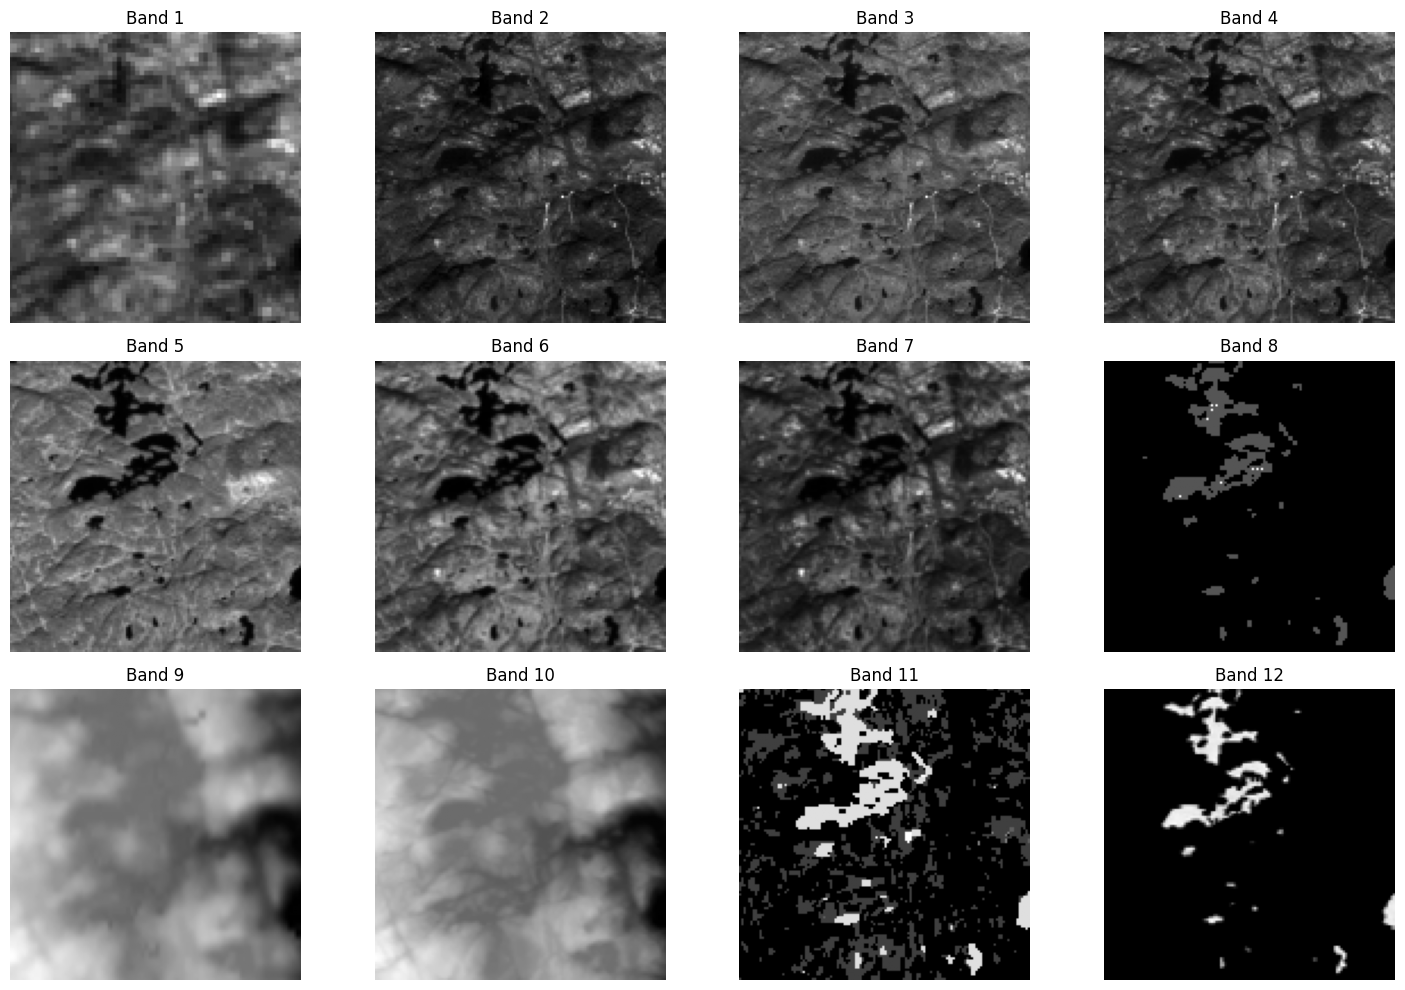

In [5]:
def visualize_all_bands(image_path):
    image = load_tif_image(image_path)
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))
    axs = axs.flatten()

    for i in range(12):
        axs[i].imshow(image[:, :, i], cmap='gray')
        axs[i].set_title(f'Band {i+1}')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_all_bands(valid_image_paths[0])

In [6]:
import cv2

def is_blurry(image, threshold=10):
    variances = []
    for i in range(image.shape[2]):
        band = image[:, :, i]
        band_uint8 = (band * 255).astype(np.uint8)
        laplacian_var = cv2.Laplacian(band_uint8, cv2.CV_64F).var()
        variances.append(laplacian_var)

    mean_var = np.mean(variances)
    return mean_var < threshold, mean_var


In [7]:
filtered_image_paths = []
filtered_mask_paths = []

for img_path, mask_path in zip(valid_image_paths, valid_mask_paths):
    image = load_tif_image(img_path)
    blurry, score = is_blurry(image)
    if not blurry:
        filtered_image_paths.append(img_path)
        filtered_mask_paths.append(mask_path)
    else:
        print(f" Blurry image skipped: {os.path.basename(img_path)} | Score: {score:.2f}")

print(f"number of filtered images {len(filtered_image_paths)}")


 Blurry image skipped: 300.tif | Score: 8.32
number of filtered images 305


In [8]:
def is_mask_valid(mask_path):
    mask = load_mask(mask_path)
    return np.any(mask)

def load_mask(mask_path):
    mask = Image.open(mask_path).convert("L")
    mask = np.array(mask)

    if mask.max() > 1:
        mask = (mask > 0).astype(np.uint8)

    return mask



final_image_paths = []
final_mask_paths = []

for img_path, mask_path in zip(filtered_image_paths, filtered_mask_paths):
    if is_mask_valid(mask_path):
        final_image_paths.append(img_path)
        final_mask_paths.append(mask_path)
    else:
        print(f"Mask is empty: {os.path.basename(mask_path)}")

print(f"number of valid masks  {len(final_image_paths)}")


Mask is empty: 103.png
Mask is empty: 106.png
Mask is empty: 107.png
Mask is empty: 115.png
Mask is empty: 122.png
Mask is empty: 136.png
Mask is empty: 14.png
Mask is empty: 151.png
Mask is empty: 152.png
Mask is empty: 155.png
Mask is empty: 163.png
Mask is empty: 167.png
Mask is empty: 173.png
Mask is empty: 188.png
Mask is empty: 189.png
Mask is empty: 204.png
Mask is empty: 207.png
Mask is empty: 21.png
Mask is empty: 211.png
Mask is empty: 227.png
Mask is empty: 232.png
Mask is empty: 258.png
Mask is empty: 266.png
Mask is empty: 273.png
Mask is empty: 280.png
Mask is empty: 289.png
Mask is empty: 292.png
Mask is empty: 296.png
Mask is empty: 299.png
Mask is empty: 302.png
Mask is empty: 304.png
Mask is empty: 31.png
Mask is empty: 37.png
Mask is empty: 38.png
Mask is empty: 41.png
Mask is empty: 47.png
Mask is empty: 5.png
Mask is empty: 58.png
Mask is empty: 70.png
Mask is empty: 75.png
Mask is empty: 80.png
Mask is empty: 82.png
Mask is empty: 88.png
Mask is empty: 90.png
Mask

In [9]:
final_image_paths
final_mask_paths


['/content/drive/MyDrive/satellite_water_seg/labels/0.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/1.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/10.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/100.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/101.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/102.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/104.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/105.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/108.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/109.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/11.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/110.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/111.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/112.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/113.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/114.png',
 '/content/dri

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader

In [11]:
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths):
        self.image_paths = image_paths
        self.mask_paths = mask_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = load_tif_image(self.image_paths[idx])
        image = np.transpose(image, (2, 0, 1))  # to [12, H, W]
        image = torch.tensor(image, dtype=torch.float32)

        mask = load_mask(self.mask_paths[idx])
        mask = torch.tensor(mask, dtype=torch.float32).unsqueeze(0)  # [1,H,W]

        return image, mask


In [12]:
from sklearn.model_selection import train_test_split


train_images, val_test_images, train_masks, val_test_masks = train_test_split(
    final_image_paths, final_mask_paths, test_size=0.3, random_state=42
)


val_images, test_images, val_masks, test_masks = train_test_split(
    val_test_images, val_test_masks, test_size=0.5, random_state=42
)


In [13]:
train_dataset = SegmentationDataset(train_images, train_masks)
val_dataset = SegmentationDataset(val_images, val_masks)
test_dataset = SegmentationDataset(test_images, test_masks)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_batch(loader):
    batch = next(iter(loader))
    images, masks = batch  # images shape: [B, C, H, W], masks shape: [B, 1, H, W]

    batch_size = images.shape[0]
    n = min(4, batch_size)

    plt.figure(figsize=(12, 6))

    for i in range(n):

        img = images[i].permute(1, 2, 0).cpu().numpy()

        if img.shape[2] > 3:
            img = img[:, :, :3]

        img = np.clip(img, 0, 1)

        mask = masks[i][0].cpu().numpy()

        plt.subplot(2, n, i + 1)
        plt.imshow(img)
        plt.title(f'Image {i+1}')
        plt.axis('off')

        plt.subplot(2, n, i + 1 + n)
        plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
        plt.title(f'Mask {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


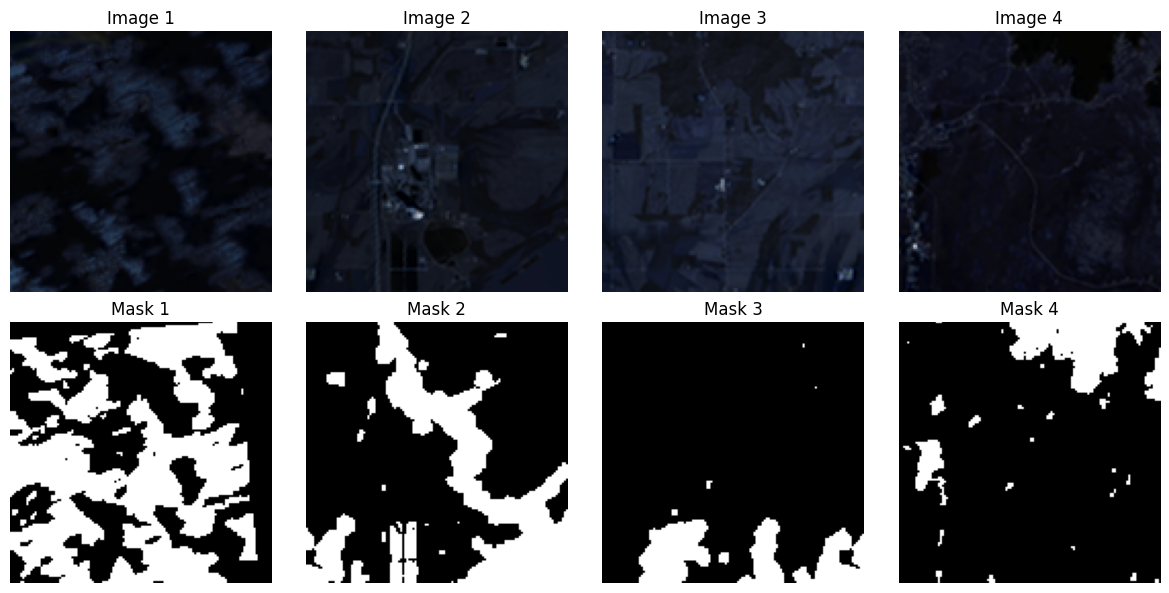

In [15]:
visualize_batch(train_loader)

In [16]:
!pip install segmentation-models-pytorch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00


In [16]:
import torch
from segmentation_models_pytorch import Unet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Unet(
    encoder_name="efficientnet-b0",
    encoder_weights="imagenet",
    in_channels=12,
    classes=1
)

model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      12, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_expand_conv): Identity()
        (_bn0): Identity()
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identi

In [17]:
def iou_score(preds, targets, threshold=0.5):
    preds = (preds > threshold).float()
    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum() - intersection
    if union == 0:
        return torch.tensor(1.0)
    return intersection / union

def accuracy_score(preds, targets, threshold=0.5):
    preds = torch.sigmoid(preds)
    preds = (preds > threshold).float()
    correct = (preds == targets).float().sum()
    total = torch.numel(preds)
    return (correct / total).item()

In [18]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for images, masks in loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    return running_loss / len(loader.dataset)

In [19]:
def validate(model, loader, criterion, device):
    model.eval()
    val_loss = 0
    val_iou = 0
    val_acc = 0

    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)

            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)

            preds = torch.sigmoid(outputs)
            iou = iou_score(preds, masks)
            acc = ((preds > 0.5) == masks).float().mean()

            val_iou += iou.item() * images.size(0)
            val_acc += acc.item() * images.size(0)

    total = len(loader.dataset)
    avg_loss = val_loss / total
    avg_iou = val_iou / total
    avg_acc = val_acc / total

    return avg_loss, avg_iou, avg_acc


In [20]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy With Logits , combination of sigmoid and Binary Cross Entropy loss

optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [21]:
train_losses = []
val_losses = []
val_ious = []
val_accs = []


In [22]:
num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_iou, val_acc = validate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_ious.append(val_iou)
    val_accs.append(val_acc)


    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val IoU: {val_iou:.4f} | Val Acc: {val_acc:.4f}")


Epoch 1/50 | Train Loss: 0.6464 | Val Loss: 0.6648 | Val IoU: 0.2849 | Val Acc: 0.6102
Epoch 2/50 | Train Loss: 0.5210 | Val Loss: 0.8301 | Val IoU: 0.2291 | Val Acc: 0.3879
Epoch 3/50 | Train Loss: 0.4298 | Val Loss: 0.4274 | Val IoU: 0.4286 | Val Acc: 0.8686
Epoch 4/50 | Train Loss: 0.3862 | Val Loss: 0.4100 | Val IoU: 0.4145 | Val Acc: 0.8416
Epoch 5/50 | Train Loss: 0.3412 | Val Loss: 0.3746 | Val IoU: 0.2204 | Val Acc: 0.8426
Epoch 6/50 | Train Loss: 0.3150 | Val Loss: 0.3626 | Val IoU: 0.2058 | Val Acc: 0.8415
Epoch 7/50 | Train Loss: 0.2919 | Val Loss: 0.3451 | Val IoU: 0.4388 | Val Acc: 0.8669
Epoch 8/50 | Train Loss: 0.2780 | Val Loss: 0.3201 | Val IoU: 0.3470 | Val Acc: 0.8679
Epoch 9/50 | Train Loss: 0.2684 | Val Loss: 0.2809 | Val IoU: 0.5031 | Val Acc: 0.9048
Epoch 10/50 | Train Loss: 0.2561 | Val Loss: 0.2499 | Val IoU: 0.5460 | Val Acc: 0.9143
Epoch 11/50 | Train Loss: 0.2438 | Val Loss: 0.2440 | Val IoU: 0.5992 | Val Acc: 0.9196
Epoch 12/50 | Train Loss: 0.2305 | Val Lo

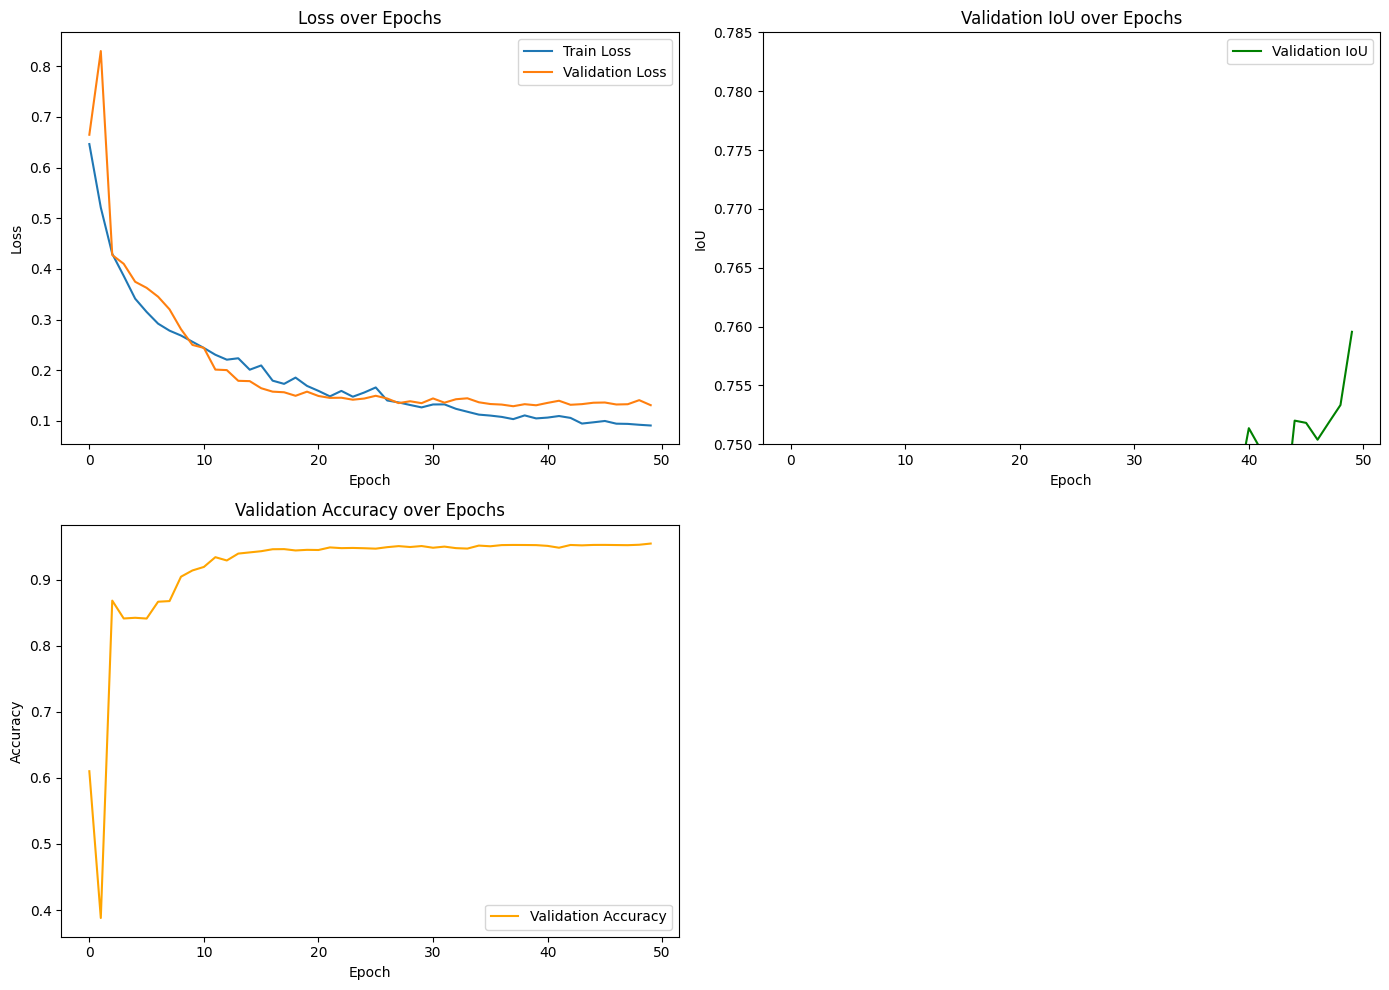

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(2, 2, 2)
plt.plot(val_ious, label='Validation IoU', color='green')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.ylim(0.75, 0.785)
plt.legend()
plt.title('Validation IoU over Epochs')

plt.subplot(2, 2, 3)
plt.plot(val_accs, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy over Epochs')

plt.tight_layout()
plt.show()


In [24]:
def visualize_predictions(model, loader, device, num=4):
    import matplotlib.pyplot as plt
    model.eval()
    images_shown = 0

    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device).float()

            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5

            for i in range(images.size(0)):
                if images_shown >= num:
                    return

                img = images[i].cpu().numpy()
                mask = masks[i].squeeze().cpu().numpy()
                pred = preds[i].squeeze().cpu().numpy()

                img_rgb = img[[0, 1, 3], :, :]


                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(img_rgb.transpose(1, 2, 0))
                axs[0].set_title('Input Image (bands 0,1,2)')
                axs[0].axis('off')

                axs[1].imshow(mask, cmap='gray')
                axs[1].set_title('Ground Truth Mask')
                axs[1].axis('off')

                axs[2].imshow(pred, cmap='gray')
                axs[2].set_title('Predicted Mask')
                axs[2].axis('off')

                plt.tight_layout()
                plt.show()

                images_shown += 1


Test Loss: 0.2185, Test IoU: 0.7864, Test Acc: 0.9187


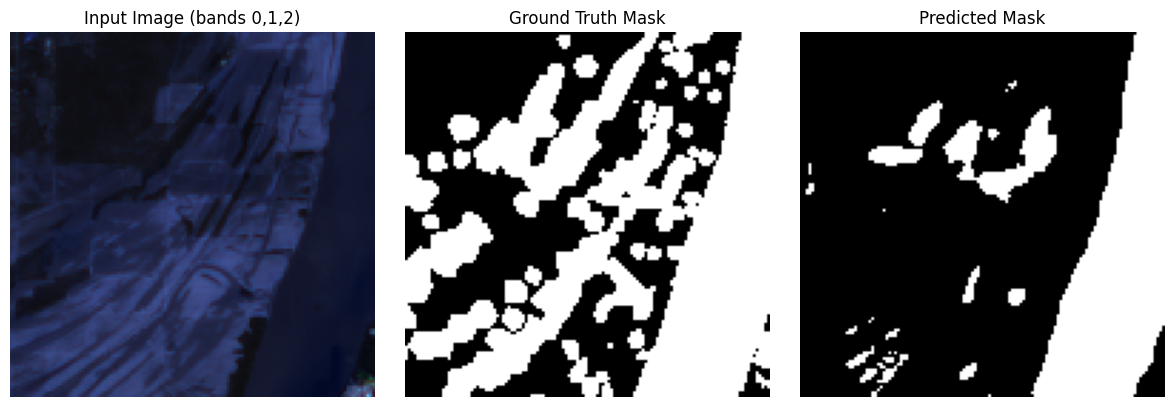

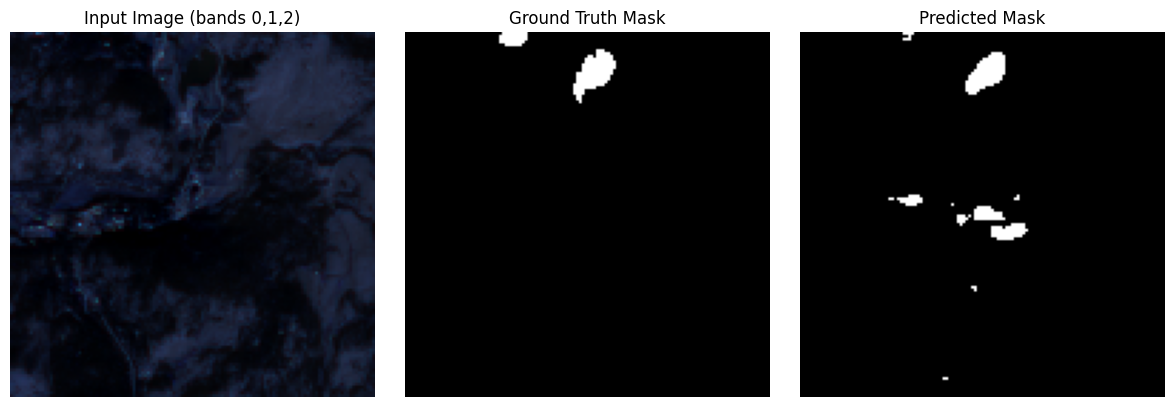

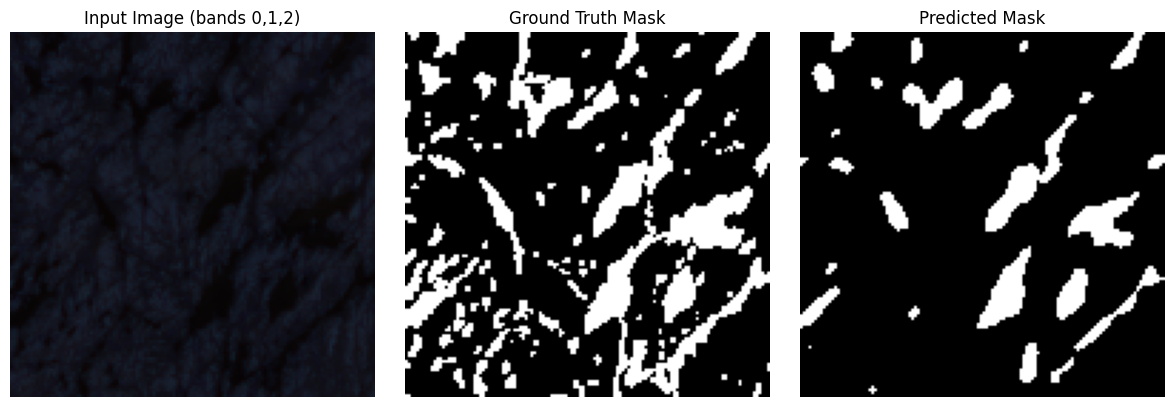

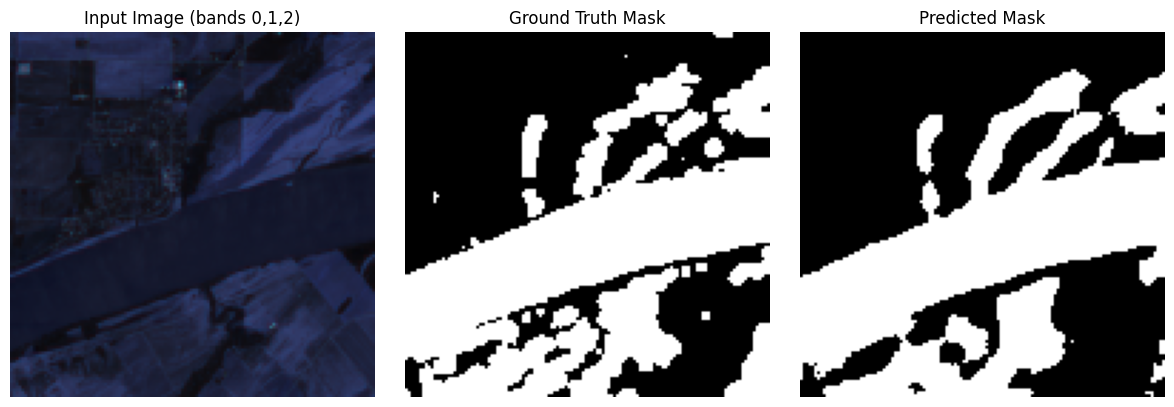

In [28]:
test_loss, test_iou, test_acc = validate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test IoU: {test_iou:.4f}, Test Acc: {test_acc:.4f}")

visualize_predictions(model, test_loader, device, num=4)


In [25]:
torch.save(model.state_dict(), 'water_segmentation_model.pth')
